<a href="https://colab.research.google.com/github/Nayal17/Opencv-Starter/blob/main/Edge_and_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/lordloh/playing-cards.git

Cloning into 'playing-cards'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 236 (delta 0), reused 1 (delta 0), pack-reused 235
Receiving objects: 100% (236/236), 522.52 MiB | 24.44 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (217/217), done.


# Edge Detection

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

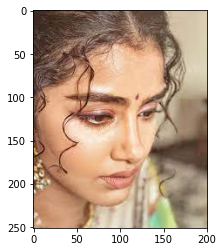

In [4]:
img = cv2.imread("/content/actress.jpg")
rgb_image = img[:,:,::-1]
plt.imshow(rgb_image)
plt.show()

Let's start with moving average filter. This will remove sharpness from the image and we will have smoother image which will be a blurry image. Blurring it with cv2.GaussianBlur we can call it gaussian smoothing which removes noise from the image.

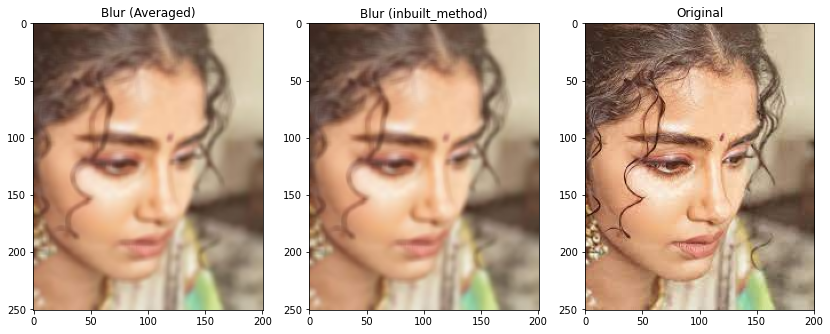

In [5]:
filter = np.ones((5,5),dtype=np.float32)/25 # kernel to average pixel values of window
averaged_img = cv2.filter2D(rgb_image,-1,filter) # -1 for same depth as of the source

# using cv2 inbuilt blur method 
cv_blur = cv2.blur(rgb_image,(5,5))

plt.figure(figsize=(14,10))
plt.subplot(131);plt.imshow(averaged_img); plt.title("Blur (Averaged)");
plt.subplot(132);plt.imshow(cv_blur); plt.title("Blur (inbuilt_method)");
plt.subplot(133);plt.imshow(rgb_image); plt.title("Original");

plt.show()

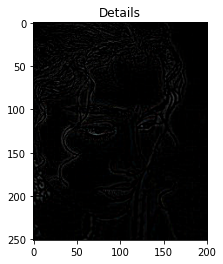

In [6]:
# details of the image
'''
details = original - blurred
'''
details = cv2.subtract(rgb_image,averaged_img)
plt.imshow(details);plt.title("Details")
plt.show()

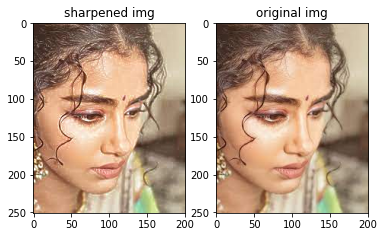

In [7]:
# Sharpened image
'''
sharpned img = original + details(edges)
'''
sharp_img = cv2.add(rgb_image, details)
plt.subplot(121);plt.imshow(sharp_img);plt.title("sharpened img");
plt.subplot(122);plt.imshow(rgb_image);plt.title("original img");

Laplacian Edge Detection (First Derivative)

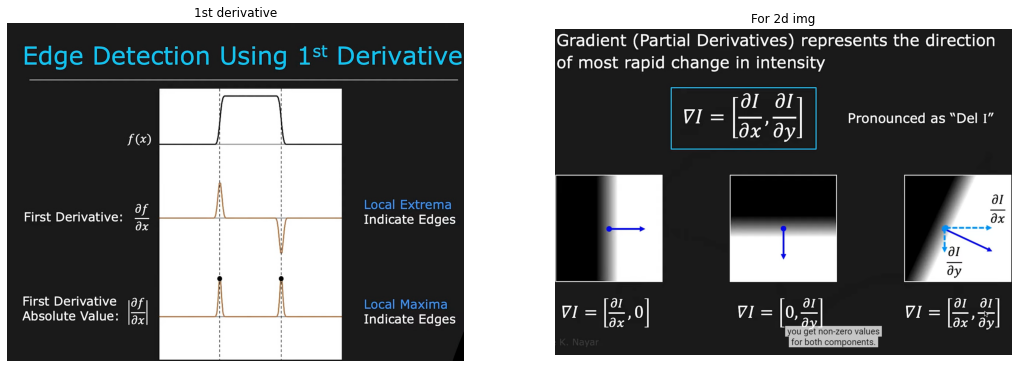

In [11]:
first_der = cv2.imread("/content/Edge(1st derivative).jpg")
for2d = cv2.imread("/content/lap_for_2d.png")
plt.figure(figsize=(18,10))
plt.subplot(121);plt.imshow(first_der);plt.axis('off');plt.title("1st derivative");
plt.subplot(122);plt.imshow(for2d);plt.title("For 2d img");plt.axis('off');plt.show()

<Figure size 432x288 with 0 Axes>

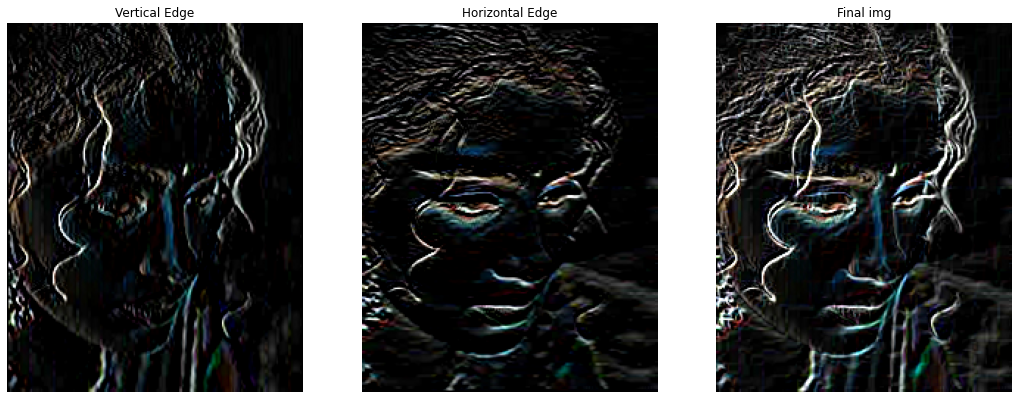

In [18]:
filter_v = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # vertical edge # if 2x2 filter , f = np.array([[-1,1],[-1,1]])
filter_h = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
plt.figure()
ver_ed = cv2.filter2D(rgb_image,-1,filter_v)
hor_ed = cv2.filter2D(rgb_image,-1,filter_h) 
final_edge = cv2.add(ver_ed,hor_ed)
plt.figure(figsize=(18,10))
plt.subplot(131);plt.imshow(ver_ed);plt.axis('off');plt.title("Vertical Edge");
plt.subplot(132);plt.imshow(hor_ed);plt.title("Horizontal Edge");plt.axis('off');
plt.subplot(133);plt.imshow(final_edge);plt.title("Final img");plt.axis("off");plt.show()

First derivative laplacian operator gets peak at the edges but for second derivative it gets zeros at the edge. 

Filter for 2nd der lap: 
          
                        [[0 , 1 , 0],

                        [1 , -4 , 1],
                        
                        [0 , 1 , 0]]

Taking diagonal edges into consideration , the modified version of lap_2d :  

                        [[1 , 4 , 1],

                        [4 , -20 , 4],

                        [1 , 4 , 1]]

# Other edge detection techniques

***These uses different filters***

cv2.Sobel(Parameters)

Parameters

**src**: 	input image.

**dst**: 	output image of the same size and the same number of channels as src .

**ddepth**: 	output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives.

**dx**: 	order of the derivative x.

**dy**: 	order of the derivative y.

**ksize**: 	size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

**scale**: 	optional scale factor for the computed derivative values; by default, no scaling is applied (see getDerivKernels for details).

**delta**: 	optional delta value that is added to the results prior to storing them in dst.

**borderType**: 	pixel extrapolation method, see BorderTypes. BORDER_WRAP is not supported.

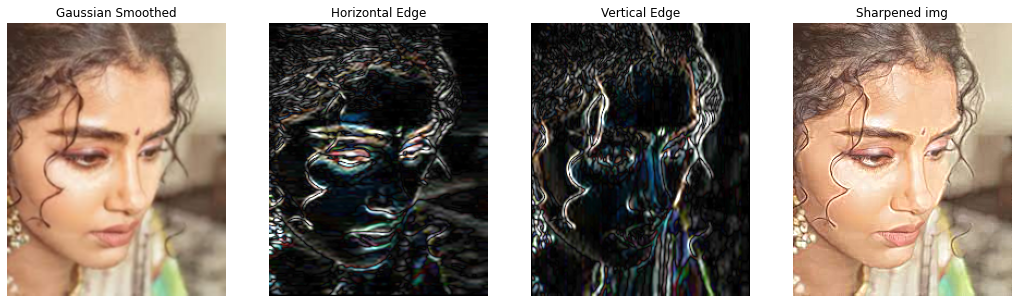

In [45]:
# sobel filter with gaussian smoothening
scale = 1
delta = 0
ddepth = cv2.CV_16S

smoothed_img = cv2.GaussianBlur(rgb_image, (3, 3),sigmaX=0)
gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(smoothed_img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)# grad in x gives vertical edges

grad_y = cv2.Sobel(smoothed_img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)# grad in x gives horizontal edges


abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.2, abs_grad_y, 0.2, 0) # reducing the weight of grads to 0.2 from 0.5 to get proper image

plt.figure(figsize=(18,10))
plt.subplot(141);plt.imshow(smoothed_img);plt.axis('off');plt.title("Gaussian Smoothed");
plt.subplot(142);plt.imshow(abs_grad_y,cmap="gray");plt.title("Horizontal Edge");plt.axis('off');
plt.subplot(143);plt.imshow(abs_grad_x,cmap="gray");plt.title("Vertical Edge");plt.axis("off");
plt.subplot(144);plt.imshow(cv2.add(rgb_image,grad));plt.title("Sharpened img");plt.axis('off');plt.show()